In [ ]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_ibm_runtime.fake_provider import FakeHanoiV2
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [2]:
from utils import *
from teleport import *

In [3]:
#No. of Qubits

n = 1

In [5]:
#Prepare state to teleport

psi_nq = state_prep(n)

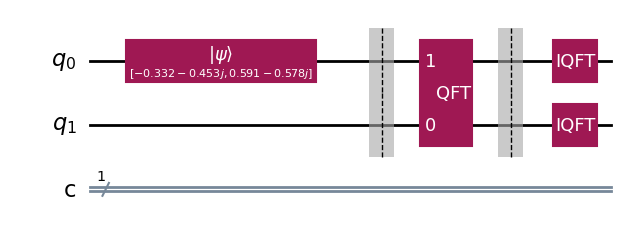

In [6]:
#Run teleportation circuit

qca, ca = teleportation_circuit_QFT(n, psi_nq)

qca.draw('mpl')

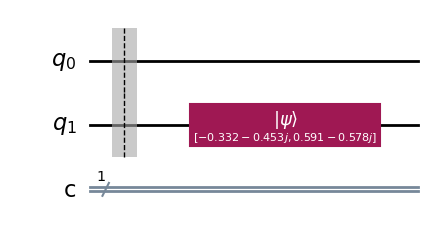

In [7]:
#Run checker circuit

qcb, cb = checker_circuit_QFT(n, psi_nq)

qcb.draw('mpl')

In [8]:
#Save the statevector for both the circuits before measurement

sva = Statevector.from_instruction(qca)
svb = Statevector.from_instruction(qcb)

In [ ]:
#Measure the state obtained for respective circuit

qca.measure(range(n + 1, 2 * n + 1), ca)
qcb.measure(range(n + 1, 2 * n + 1), cb)

In [ ]:
#Load the simulator
backend = FakeHanoiV2()

#Load the backend
"""from qiskit_ibm_runtime import QiskitRuntimeService, Batch

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)"""

In [ ]:
#Job for Teleportation circuit

joba = simulate(qca, backend)

In [ ]:
#Count for Teleportation circuit

counta_qft = get_result(joba, n)

In [ ]:
#Job list for Checker circuit

jobb = simulate(qcb, backend)

In [ ]:
#Count for Checker circuit

countb_qft = get_result(jobb, n)

In [ ]:
#Check fidelity of the counts obtained by the Quantum computer

fdlty_qft = calc_fdlty(counta_qft, countb_qft) 
fdlty_qft

In [ ]:

#Check Fidelity of state obtained post teleportation and one before it

state_fdlty_qft = state_fidelity(extract_state_QFT(sva), extract_state_QFT(svb))
state_fdlty_qft

In [ ]:
# Save variables to a file
with open('Variables.pkl', 'wb') as f:
    pickle.dump({'counta_qft': counta_qft, 'countb_qft': countb_qft, 'fdlty_qft': fdlty_qft, 'state_fdlty_qft' : state_fdlty_qft, 'n' : n}, f)
